<a href="https://colab.research.google.com/github/SkaiLord/ML-Lab/blob/main/ML_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 6

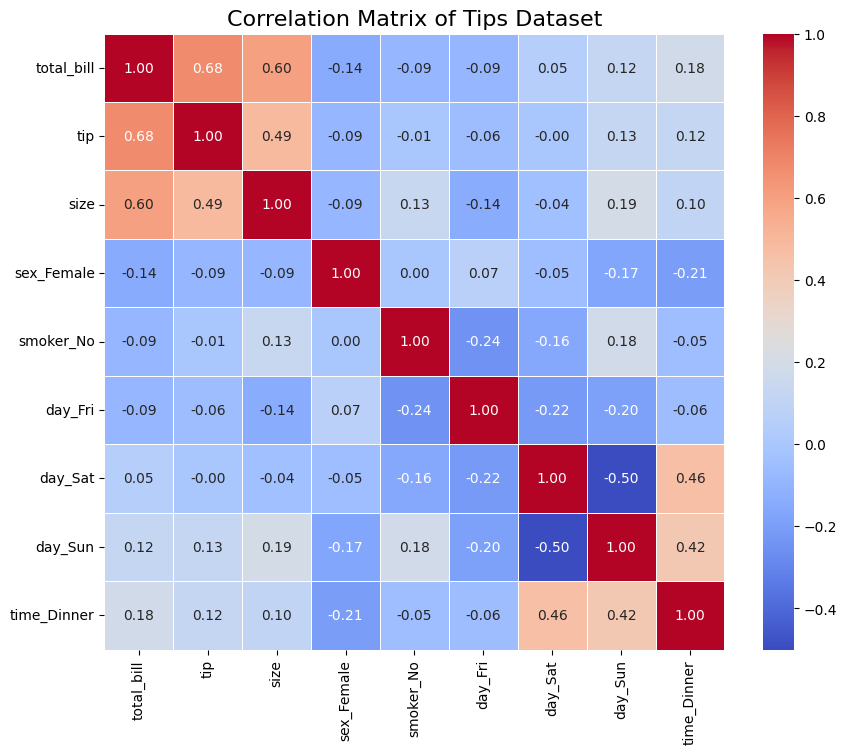

Refined Multiple Regression Results:
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           1.20e-28
Time:                        05:00:44   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        

In [ ]:
# Import necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the 'tips' dataset from seaborn
tips = sns.load_dataset('tips')
# Convert categorical variables to numerical using one-hot encoding
tips = pd.get_dummies(tips, drop_first=True)
# Convert all data to float type
tips = tips.astype(float)

# Calculate the correlation matrix
corr_matrix = tips.corr()
# Set the figure size for the heatmap
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
# Set the title of the heatmap
plt.title('Correlation Matrix of Tips Dataset', fontsize=16)
# Display the heatmap
plt.show()

# Get the upper triangle of the correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Identify columns with correlation greater than 0.8
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

# Remove highly correlated columns from the dataset
tips_refined = tips.drop(columns=to_drop)
# Separate features (X) and target variable (y)
X = tips_refined.drop('tip', axis=1)
y = tips_refined['tip']
# Add a constant term to the features
X = sm.add_constant(X)

# Fit an Ordinary Least Squares (OLS) regression model
model = sm.OLS(y, X).fit()
# Print the results of the refined multiple regression
print("Refined Multiple Regression Results:")
print(model.summary())